# 전처리: 단어의 벡터 표현

---
- 참고도서
  - 딥 러닝을 이용한 자연어 처리 입문(유원준,안상준 저 | 무료 e-book) https://wikidocs.net/book/2155
  - PyTorch로 시작하는 딥 러닝 입문(유원준,안상준 저 | 무료 e-book) https://wikidocs.net/book/2788
  - 파이썬으로 배우는 응용 텍스트 분석(벤자민 벵포트,레베카 빌브로,토니 오제다 저/박진수 역 | 제이펍)
  - 김기현의 자연어 처리 딥러닝 캠프-파이토치편(김기현 저 | 한빛미디어)
---

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 단어의 의미와 유사성, 모호성

자연어 처리에서 가장 기본이 되면서 어려운 문제는 단어와 단어의 의미와의 관계를 파악하는 것이다. 
단어를 글자로 표현할 때는 하나의 형태를 가지지만 상황에 따라 다른 의미로 사용된다. 

* 동형어 - 형태는 같으나 뜻이 서로 다른 단어
* 다의어 - 한 형태의 단어가 여러 의미를 지니는 단어
* 동의어 - 같은 의미를 가지는 다른 형태의 단어

 **자연어 처리를 위하여 단어의 중의성을 제거하는 작업이 필요하다.** 
 **자연어 처리를 위해서는 각 단어에 정확한 값을 부여하는 작업이 요구된다.**



## 임베딩 
단어나 문장을 수치화 화여 벡터공간으로 표현하는 과정 

임베딩을 하는 이유는 컴퓨터는 자연어는 직접적으로 처리할 수 없고 수치연산만 가능하기 때문이다.

#### 임베딩 기법의 종류 
* 문장 임베딩 - 문장 전체를 벡터로 표현하는 방법
  전체 문장의 흐름을 파악해 벡터로 변환하기 때문에 문맥적 의미를 지니는 장점을 가지지만 학습비용이 크다는 단점이 존재 


* 단어 임베딩 - 개별 단어를 벡터로 표현하는 방법
  동음어 구분을 하지 않는다 즉 의미가 달라도 단어의 형태가 같으면 동일한 벡터값을 가짐, 학습방법이 간단하다는 장점이 있다. 


* 원핫 인코딩 - 원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다. 이렇게 표현된 벡터를 원-핫 벡터(One-Hot vector)라고 한다. (희소표현)
  단어는 불연속적인 심볼이며 이산 확률 변수로 나타남→원핫 벡터는 이산 확률 분포에서 추출한 샘플→불연속적인 값을 가짐 유사도를 계산하기 위하여 벡터간 연산을 할 때, 결과가 0 이 된다는 특징이 있다.
    
  
 
* 원핫 인코딩의 단점인 차원의 수가 많아진다는 점을 보완하기 위해 분산표현 사용, 분산 표현은 한 단어의 정보가 특정 차원에 표현되지 않고 여러 차원에 분산되어 표현되기 떄문에 벡터 공간을 절약할 수 있는 방법이다. 데이터 손실을 최소화 하면서 압축할 수 있다. 

In [35]:
# 문장 토큰화 
from konlpy.tag import Okt  

okt = Okt()
tokens = okt.morphs('요즘 패션업계의 화두는 ‘애슬레저’다. 애슬레저는 애슬레틱(athletic)과 레저(leisure)의 합성어로, 일상복과의 경계를 허문 스포츠웨어를 뜻한다.')
print(tokens)


['요즘', '패션', '업계', '의', '화두', '는', '‘', '애', '슬레', '저', '’', '다', '.', '애', '슬레', '저', '는', '애', '슬레', '틱', '(', 'athletic', ')', '과', '레저', '(', 'leisure', ')', '의', '합성어', '로', ',', '일', '상복', '과의', '경계', '를', '허문', '스포츠', '웨어', '를', '뜻', '한다', '.']


In [36]:
# 정수 부여 
word_to_index = {word : index for index, word in enumerate(tokens)}
print('단어 집합 :',word_to_index)

단어 집합 : {'요즘': 0, '패션': 1, '업계': 2, '의': 28, '화두': 4, '는': 16, '‘': 6, '애': 17, '슬레': 18, '저': 15, '’': 10, '다': 11, '.': 43, '틱': 19, '(': 25, 'athletic': 21, ')': 27, '과': 23, '레저': 24, 'leisure': 26, '합성어': 29, '로': 30, ',': 31, '일': 32, '상복': 33, '과의': 34, '경계': 35, '를': 40, '허문': 37, '스포츠': 38, '웨어': 39, '뜻': 41, '한다': 42}


In [37]:
# 원핫 인코딩  

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [38]:
labels = labels.reshape(-1, 1)
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [39]:
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

oh_array = oh_labels.toarray()
print(oh_array)
print(oh_array.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


In [40]:
df = pd.DataFrame({'items': items})
df

,items
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [41]:
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


###  패딩
- 자연어 처리를 하다보면 각 문장(또는 문서)은 서로 길이가 다를 수 있음
- 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있음
- 즉, 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요할 때가 있음
- 이러한 작업을 패딩(Padding) 이라고 함

In [42]:
import urllib.request
from nltk import FreqDist
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [43]:
data = pd.read_table('/content/ratings.txt')
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [44]:
print(f'전체 샘플의 수 :{len(data)}')

전체 샘플의 수 :200000


In [45]:
sample_data = data[:100] # 임의로 100개만 저장

In [46]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [47]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [48]:
sentence = sample_data['document']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence)
temp = [word for word in sentence if not word in stopwords] # 불용어 제거
encoded = tokenizer.texts_to_sequences(temp)
print(encoded)

[[41, 42, 43], [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 14, 57, 20, 58, 59, 60, 13, 61, 62, 13, 63, 64, 65, 66, 5, 67, 68, 69], [70, 71, 72, 73, 74, 75, 76, 6], [77, 21, 3, 78, 79, 80, 81, 82, 83, 84, 3, 85], [86, 87, 88, 89, 90, 91, 13, 1], [92, 93, 94, 20, 95, 96], [22, 97, 98, 99], [100, 101, 102, 103, 104, 23, 105], [24], [106, 107, 108, 109, 110], [25, 111, 13, 26, 112, 7, 113, 114, 115, 116, 14, 117, 118, 27], [119], [120, 121], [122, 123, 124, 125, 126, 127, 128, 5, 28, 129], [130, 131, 132], [29, 15, 133, 134, 135, 3, 136, 3, 137, 138, 139, 140, 141], [142, 143, 144, 145, 146, 147], [148, 6], [149, 30, 31, 150, 151, 152], [153, 4, 154, 155, 156, 157, 158, 159, 160, 161], [162, 7, 163, 164, 165], [166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 8, 190, 191, 192, 193, 194], [195, 196, 197], [198, 16, 199], [200, 24, 201], [202, 203, 204, 205, 206, 207, 208, 32, 209, 210, 211, 212, 213, 214, 215, 2

In [49]:

padded = pad_sequences(encoded)
padded

array([[  0,   0,   0, ...,  41,  42,  43],
       [  0,   0,   0, ...,  67,  68,  69],
       [  0,   0,   0, ...,  75,  76,   6],
       ...,
       [  0,   0,   0, ..., 627, 628,  17],
       [  0,   0,   0, ...,   0,   0, 629],
       [630, 631, 632, ..., 655, 656, 657]], dtype=int32)

In [50]:
padded = pad_sequences(encoded, padding='post')
padded

array([[ 41,  42,  43, ...,   0,   0,   0],
       [ 44,  45,  46, ...,   0,   0,   0],
       [ 70,  71,  72, ...,   0,   0,   0],
       ...,
       [627, 628,  17, ...,   0,   0,   0],
       [629,   0,   0, ...,   0,   0,   0],
       [630, 631, 632, ..., 655, 656, 657]], dtype=int32)

리뷰의 최대 길이 : 35
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 7.510000


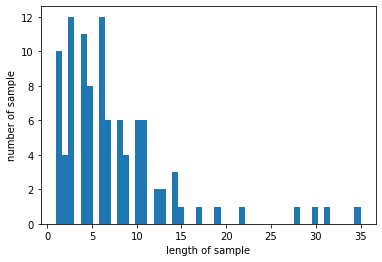

In [51]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

## 단어의 의미 파악 

### 시소러스 활용 기법
사전에 단어의 의미를 정의, 동의어 및 유의어가 한 그룹으로 분류되어 있는 사전 
단어들의 의미를 상위, 하위 관계에 기초하여 표현 
시소러스를 만들고 관리하기 위해 비용이 많이들고 단어의 미묘한 차이를 표현하기 어렵다는 단점이 존재한다. 

#### 시소러스의 대표적인 모델 WordNet (Directed Acyclic Graph,DAG 로 구성) 특징 별 수치를 모아 벡터로 표현

* WordNet 특징 
* 단어의 특징 벡터를 구성하기 위한 가정 ,의미가 비슷한 단어라면 쓰임새가 비슷할 것, 쓰임새가 비슷하므로 비슷한 문장 안에서 비슷한 역할로 사용될 것 따라서 함께 나타나는 단어들이 유사할 것





### TF-IDF(Term Frequency-Inverse Document Frequency)
TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다. 우선 DTM을 만든 후, TF-IDF 가중치를 부여

TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있다.  

* TF:단어가문서에 출현한횟수, 값이클수록 문서에서 중요한단어일 확률높음
* DF:해당단어가 출현한문서의수, 값이클수록 중요하다고하기보다는 일반적으로 많이 쓰이는 단어일 가능성이 높음(‘the’와 같은 것)

$idf(d,t) = log(n / 1+ df(t))$


TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단한다. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것이다. 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 된다.

In [52]:
# WordNet 사용 

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
from nltk.corpus import wordnet

- "car"라는 단어가 가지고 있는 그룹 확인하기
  - "car"라는 단어에는 다섯 가지 의미(정확하게는 5개의 서로 다른 동의어 그룹)가 정의되어 있다는 뜻임


In [54]:
wordnet.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

- 동의어 그룹을 지정하여 그 정의를 확인하기
  - "car.n.01" 의 의미는 "네개의 바퀴를 가진 차량. 일반적으로 내연기관에 의해 움직인다"임
  - "car.n.02"의 의미는 "철도 레일에 적합한 바퀴 달린 차량"을 의미함

In [55]:
car = wordnet.synset('car.n.01')    # 동의어 그룹 지정
car.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [56]:
car2 = wordnet.synset('car.n.02')    # 동의어 그룹 지정
car2.definition()

'a wheeled vehicle adapted to the rails of railroad'

In [57]:
# 동의어 그룹에 속한 단어들의 이름 가져오기 

car.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [58]:
car2.lemma_names()

['car', 'railcar', 'railway_car', 'railroad_car']

- WordNet과 단어 네트워크 확인
  - "car"의 단어 네트워크를 사용하여 다른 단어와의 의미적인 상하관계 살펴보기
  - "entity > physical_entity > object > ... > motor_vehicle > car"의 경로를 따라감을 알 수 있음
  - WordNet을 구성하는 단어 네트워크는 위로 갈수록 추상적이고, 아래로 갈수록 구체적인 단어로 배치됨

In [59]:
car.hypernym_paths()[0]

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('container.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

In [60]:
car = wordnet.synset('car.n.01')
novel = wordnet.synset('novel.n.01')
dog = wordnet.synset('dog.n.01')
motorcycle = wordnet.synset('motorcycle.n.01')

In [61]:
# 유사도 계산 

car.path_similarity(novel)

0.05555555555555555

In [62]:
car.path_similarity(dog)

0.07692307692307693

In [63]:
car.path_similarity(motorcycle)

0.3333333333333333

In [64]:
# 특징 추출 
# TF-IDF 

doc1 = '''
지능지수라는 말을 들어보셨을겁니다. 여러분의 지성을 일컫는 말이죠. 그런데 심리지수란건 뭘까요? 사람들이 특정한 방식으로 행동하는 이유에 대해 여러분은 얼마나 알고 계시나요? 또 타인이나 심지어 여러분의 행동을 예측하는 일은 얼마나 잘 하시나요? 또, 심리학에 대해 갖춘 지식 중에서 어느 정도나 잘못된 것일까요? 심리학에 관한 열 가지 신화를 통해 잘못된 것들을 알아보도록 하죠. 여러분은 한 번쯤 들어 보셨을 법한 것은 자신들의 심리학에 대해 고려할 때, 거의 항상 남자는 화성에서 왔고, 여자는 금성에서 온 것 같다고 합니다. 하지만 실제로 남자와 여자는 얼마나 다른 걸까요? 이를 알아보기 위해, 일단 남녀 사이에 확실하게 차이나는 것을 살펴보고 심리학적인 성별 간의 차이점을 동일한 척도 상에서 대비해 보도록 하겠습니다. 남자와 여자 간에 실제로 차이나는 능력 중 하나는 그들이 공을 얼마나 멀리 던질 수 있느냐 하는 것입니다. 여기 남자들의 데이타를 보시면, 정상 분포 곡선이라는걸 볼 수 있습니다. 남자들 소수는 정말 멀리 던지고, 남자들 소수는 멀리 던지지 못하지만, 남자들 대부분은 평균적인 거리를 던졌습니다. 여자들도 역시 비슷한 분포 상태를 보입니다만 사실 남녀 사이엔 커다란 차이가 있습니다. 사실, 평균 수준의 남자라면 모든 여성 중 대략 98%보다 더 멀리 던질 수 있거든요. 이와 동일하게 표준화된 척도 상에서 심리학에서 말하는 성별 간의 차이를 살펴봅시다. 심리학자라는 여러분에게 말하길 남자들의 공간지각 능력이 여자들보다 뛰어나다고 할겁니다. 예를 들어, 지도를 읽는 능력같은건데, 맞는 말입니다. 하지만 그 차이의 정도를 살펴봅시다. 아주 작죠 . 두 선이 너무 근접해서 거의 겹칠 정도입니다.
'''

doc2 = '''
최상의 제시 유형은 학습자에 좌우되는 것이 아니라 학습해야 할 내용에 따라 좌우됩니다. 예를 들어 여러분이 운전하기를 배울 때 실제로 몸으로 체감하는 경험 없이 누군가가 어떻게 할 지 이야기하는 것을 듣는 것만으로 배울 수 있습니까? 연립 방정식을 풀어야 하는데 종이에 쓰지않고 머리 속에서 말하는 것으로 풀 수가 있을까요? 또는 만일 여러분이 체감 형식의 학습자 유형이라면, 건축학 시험을 해석적 춤을 이용하여 수정할 수 있을까요? 아니죠! 배워야 할 내용을 제시된 유형에 맞추어야 합니다, 당신에게 맞추는게 아니라요. 여러분들 상당수가 "A" 급의 우등생이라는 걸 아는데, 조만간 중등학력 인증시험(GCSE) 결과를 받게 되시겠네요. 그런데, 만일, 여러분들이 희망했던 성적을 받지 못하게 된다해도 여러분들의 학습 방식을 탓해서는 안되는 겁니다. 여러분이 비난할 수 있는 한 가지는 바로 유전자입니다. 이건 최근에 런던 대학교(UCL)에서 수행했던 연구 결과는 여러 학생들과 그들의 중등학력 인증시험 결과 사이의 차이 중 58%는 유전적인 요인으로 좁혀졌습니다. 매우 정밀한 수치처럼 들립니다. 그러면 어떻게 알 수 있을까요? 유전적 요인과 환경적 요인의 상대적 기여도를 알고 싶을 때 우리가 사용할 수 있는 방식은 바로 쌍둥이 연구입니다. 일란성 쌍생아의 경우 환경적 요인과 유전적 요인 모두를 100% 똑같이 공유하게 되지만 이란성 쌍생아의 경우는 100% 동일한 환경을 공유하지만 유전자의 경우 여타의 형제자매들 처럼 50%만 공유하게 됩니다. 따라서 일란성 쌍둥이와 이란성 쌍둥이 사이의 인증시험 결과가 얼마나 비슷한지 비교해 보고 여기에 약간의 수학적 계산을 더하게 되면 그 수행 능력의 차이 중 어느 정도가 환경적 요인의 탓이고 어느 정도가 유전자 탓인지를 알 수 있게 됩니다 .
'''

doc3 = '''
그러나 이 이야기는 세 가지 이유로 인해 신화와 같습니다. 첫째, 가장 중요한 건 실험실 가운은 흰색이 아니라 회색이었다라는 점이죠. 둘째, 참여자들은 실험하기 전에와 참여자들이 걱정을 표현할 때마다 상기시키는 말을 들었는데, 전기 충격이 고통스럽기는 하지만, 치명적이지는 않으며 실제로 영구적인 손상을 남기는 일은 없을거라는 것이었습니다. 셋째, 참여자들은 단지 가운을 입은 사람이 시켜 전기 충격을 주지는 않았죠. 실험이 끝나고 그들의 인터뷰를 했을때 모든 참여자들은 강한 신념을 밝혔는데, '학습과 처벌' 연구가 과학적으로 가치있는 목적을 수행했기 때문에 비록 동료 참여자들에게 가해진 순간적인 불편함에 반해서 과학을 위해서 오래 남을 성과를 얻을것이라고 말이죠. 그러다 보니 제가 이야기를 한 지 벌써 12분이 되었습니다. 여러분들 중에는 아마 거기 앉아서 제 이야기를 들으시는 동안 저의 말투와 몸짓을 분석하면서 제가 말하는 어떤 것을 인지해야 할까 해결하려고 하셨을겁니다, 제가 진실을 이야기하는지, 또는 거짓말을 하고 있는것인지 말이죠. 만일 그러셨다면, 아마 지금쯤 완전히 실패하셨을겁니다. 왜냐하면 우리 모두가 사람이 말하는 패턴과 몸짓으로도 거짓말 여부를 알아내는 것 이 가능하다고 생각하지만, 오랜 세월 수 백회에 걸쳐 행해진 실제 심리검사의 결과를 보면 우리들 모두는, 심지어 경찰관이나 탐정들을 포함해서도 기본적으로 몸짓과 언어적 패턴으로 거짓말을 탐지하는 것은 운에 맡길 수 밖에는 없는 것입니다. 흥미롭게도 한 가지 예외가 있는데요: 실종된 친척을 찾아달라고 호소하 는 TV 홍보입니다.
'''

In [65]:
# 특정 문서가 주어졌을 때, 문서 내의 단어들의 출현 빈도를 세는 함수
def get_term_frequency(document, word_dict=None):
    if word_dict is None:
        word_dict = {}
    words = document.split()

    for w in words:
        word_dict[w] = 1 + (0 if word_dict.get(w) is None else word_dict[w])

    return pd.Series(word_dict).sort_values(ascending=False)

In [66]:
get_term_frequency(doc1)

얼마나       4
멀리        4
심리학에      3
수         3
대해        3
         ..
온         1
것         1
같다고       1
합니다.      1
정도입니다.    1
Length: 175, dtype: int64

In [67]:
# 문서들이 주어졌을 때 각 단어가 몇 개의 문서에서 나타났는지 세는 함수
def get_document_frequency(documents):
    dicts = []
    vocab = set([])
    df = {}

    for d in documents:
        tf = get_term_frequency(d)
        dicts += [tf]
        vocab = vocab | set(tf.keys())
    
    for v in list(vocab):
        df[v] = 0
        for dict_d in dicts:
            if dict_d.get(v) is not None:
                df[v] += 1

    return pd.Series(df).sort_values(ascending=False)

In [68]:
get_document_frequency([doc1, doc2])

것을      2
동일한     2
한       2
그       2
어느      2
       ..
여러분은    1
방정식을    1
고려할     1
수행했던    1
남자는     1
Length: 343, dtype: int64

In [69]:
def get_tfidf(docs):
    vocab = {}
    tfs = []
    for d in docs:
        vocab = get_term_frequency(d, vocab)
        tfs += [get_term_frequency(d)]
    df = get_document_frequency(docs)

    from operator import itemgetter
    import numpy as np

    stats = []
    for word, freq in vocab.items():
        tfidfs = []
        for idx in range(len(docs)):
            if tfs[idx].get(word) is not None:
                tfidfs += [tfs[idx][word] * np.log(len(docs) / df[word])]
            else:
                tfidfs += [0]

        stats.append((word, freq, *tfidfs, max(tfidfs)))

    return pd.DataFrame(stats, columns=('word',
                                        'frequency',
                                        'doc1',
                                        'doc2',
                                        'doc3',
                                        'max')).sort_values('max', ascending=False)

In [70]:
get_tfidf([doc1, doc2, doc3])

,word,frequency,doc1,doc2,doc3,max
3,멀리,4,4.394449,0.000000,0.000000,4.394449
13,환경적,3,0.000000,3.295837,0.000000,3.295837
15,심리학에,3,3.295837,0.000000,0.000000,3.295837
19,남자들,3,3.295837,0.000000,0.000000,3.295837
9,참여자들은,3,0.000000,0.000000,3.295837,3.295837
...,...,...,...,...,...,...
12,것을,3,0.000000,0.000000,0.000000,0.000000
6,한,4,0.000000,0.000000,0.000000,0.000000
5,말하는,4,0.000000,0.000000,0.000000,0.000000
4,실제로,4,0.000000,0.000000,0.000000,0.000000


In [71]:
# TF 행렬 만들기
def get_tf(docs):
    vocab = {}
    tfs = []
    for d in docs:
        vocab = get_term_frequency(d, vocab)
        tfs += [get_term_frequency(d)]

    from operator import itemgetter
    import numpy as np

    stats = []
    for word, freq in vocab.items():
        tf_v = []
        for idx in range(len(docs)):
            if tfs[idx].get(word) is not None:
                tf_v += [tfs[idx][word]]
            else:
                tf_v += [0]
        stats.append((word, freq, *tf_v))
    
    return pd.DataFrame(stats, columns=('word',
                                        'frequency',
                                        'doc1',
                                        'doc2',
                                        'doc3')).sort_values('frequency', ascending=False)


In [72]:
get_tf([doc1, doc2, doc3])

,word,frequency,doc1,doc2,doc3
0,수,11,3,6,2
1,얼마나,5,4,1,0
2,중,4,2,2,0
3,멀리,4,4,0,0
4,실제로,4,2,1,1
...,...,...,...,...,...
217,운에,1,0,0,1
216,우리들,1,0,0,1
215,맡길,1,0,0,1
214,없는,1,0,0,1



- get_tf의 결과
  - 각 단어들에 대한 TF에서 doc1, doc2, doc3의 단어별 출현횟수가 특징벡터로 사용됨
  - 예를 들어 "여러분"이라는 단어는 [5, 6, 1]이라는 특징벡터를 가짐
  - 단순히 문서에서의 출현 횟수만으로 특징 벡터를 구성하다보니 많은 정보가 유실됨

---


* sklearn 사용해서 TF-IDF

In [73]:
# 출현횟수를 기반으로 하는 CountVectorizer를 이용하여 특징 추출하기
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
# 텍스트 데이터 준비
text_data = ['요즘 패션업계의 화두는 ‘애슬레저’다. 애슬레저는 애슬레틱(athletic)과 레저(leisure)의 합성어로, 일상복과의 경계를 허문 스포츠웨어를 뜻한다.' ,
             '소비자에게 인기 높은 브랜드를 집중적으로 취급하는 백화점에서의 성장 속도는 더 빠르다.']
count_vectorizer = CountVectorizer()

In [81]:
# 단어 사전 만들기
count_vectorizer.fit(text_data)
print(count_vectorizer.vocabulary_)

{'요즘': 16, '패션업계의': 21, '화두는': 24, '애슬레저': 13, '애슬레저는': 14, '애슬레틱': 15, 'athletic': 0, '레저': 5, 'leisure': 1, '합성어로': 22, '일상복과의': 18, '경계를': 2, '허문': 23, '스포츠웨어를': 12, '뜻한다': 4, '소비자에게': 10, '인기': 17, '높은': 3, '브랜드를': 7, '집중적으로': 19, '취급하는': 20, '백화점에서의': 6, '성장': 9, '속도는': 11, '빠르다': 8}


In [82]:
# 텍스트를 벡터로 만들기
sentence = [text_data[0]]    
print(count_vectorizer.transform(sentence).toarray())

[[1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1]]


In [83]:
# TfidfVectorizer를 이용하여 특징 추출하기(TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
# 텍스트 데이터 준비
text_data = ['요즘 패션업계의 화두는 ‘애슬레저’다. 애슬레저는 애슬레틱(athletic)과 레저(leisure)의 합성어로, 일상복과의 경계를 허문 스포츠웨어를 뜻한다.' ,
             '소비자에게 인기 높은 브랜드를 집중적으로 취급하는 백화점에서의 성장 속도는 더 빠르다.']
tfidf_vectorizer = TfidfVectorizer()

In [85]:
# 단어 사전 만들기
tfidf_vectorizer.fit(text_data)
print(tfidf_vectorizer.vocabulary_)

{'요즘': 16, '패션업계의': 21, '화두는': 24, '애슬레저': 13, '애슬레저는': 14, '애슬레틱': 15, 'athletic': 0, '레저': 5, 'leisure': 1, '합성어로': 22, '일상복과의': 18, '경계를': 2, '허문': 23, '스포츠웨어를': 12, '뜻한다': 4, '소비자에게': 10, '인기': 17, '높은': 3, '브랜드를': 7, '집중적으로': 19, '취급하는': 20, '백화점에서의': 6, '성장': 9, '속도는': 11, '빠르다': 8}


In [86]:
# 텍스트를 벡터로 만들기
sentence = [text_data[1]]   
print(tfidf_vectorizer.transform(sentence).toarray())

[[0.         0.         0.         0.31622777 0.         0.
  0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
  0.         0.         0.         0.         0.         0.31622777
  0.         0.31622777 0.31622777 0.         0.         0.
  0.        ]]
